In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pvlib
import datetime
import random

from sklearn import metrics

plt.rcParams["font.family"] = "Times New Roman"

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv('2009_20_solar_ghi_dra_daily.csv')
df_raw['date'] = pd.to_datetime(df_raw['date'])
df_raw = df_raw.set_index('date')
df_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,clear day
date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,70.1,67.6,65.2,62.8,60.3,57.6,55.2,52.8,50.4,48.0,...,97.7,96.3,92.8,88.6,84.9,81.9,79.1,76.5,73.6,NaN
2009-01-03,71.3,68.7,66.2,64.4,63.4,60.9,58.3,55.4,49.7,38.0,...,105.4,102.5,99.3,96.2,93.4,90.7,87.8,84.9,82.0,NaN
2009-01-04,79.0,76.4,73.7,70.9,68.1,65.5,62.8,60.2,57.5,55.1,...,108.9,105.8,102.9,100.0,96.9,94.1,91.1,88.3,85.5,NaN
2009-01-05,82.7,79.8,77.0,74.3,71.5,68.6,65.8,63.3,60.7,57.6,...,18.7,20.5,20.8,20.3,20.0,20.3,19.7,17.2,14.0,NaN
2009-01-06,11.2,8.6,6.7,5.8,5.0,4.3,3.4,2.6,2.4,2.6,...,102.8,99.9,97.3,94.5,90.2,85.4,82.9,81.5,79.4,NaN


In [3]:
# select the data for 2020
dates_20 = pd.date_range(start = '2020-01-01', end = '2020-12-31', freq = '1d')
index_20 = [index for index in dates_20 if index in df_raw.index]
df_20 = df_raw.loc[index_20]
df_20.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,clear day
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,29.6,29.0,28.4,27.7,27.6,28.6,38.6,58.1,56.7,52.4,...,29.4,28.2,27.8,27.5,28.0,29.6,32.2,37.6,42.1,NaN
2020-01-02,41.7,37.8,30.4,29.1,29.0,29.9,30.4,32.0,34.7,42.7,...,67.8,65.2,67.4,76.7,72.0,63.2,63.0,50.0,40.0,NaN
2020-01-03,32.1,29.9,28.5,26.5,24.0,22.6,21.3,20.9,20.3,19.2,...,108.6,114.0,132.8,129.1,132.7,132.6,118.3,102.6,88.3,NaN
2020-01-04,87.6,92.9,85.5,79.8,66.9,57.3,53.5,50.5,48.9,48.1,...,54.8,55.0,56.8,58.9,58.8,56.7,55.0,53.3,51.2,NaN
2020-01-05,48.9,46.8,45.3,44.6,44.3,43.8,42.7,41.2,39.4,37.8,...,111.8,113.5,110.1,106.6,104.1,97.4,98.3,92.7,91.7,NaN
2020-01-06,89.4,86.6,83.3,78.4,69.9,73.7,73.3,69.8,66.8,63.4,...,108.5,105.8,103.2,100.3,97.6,95.0,92.3,89.6,86.9,1.0
2020-01-07,84.3,81.7,79.2,76.5,74.1,71.6,69.1,66.8,64.3,61.7,...,62.6,61.0,59.5,58.1,56.6,55.0,53.4,51.6,49.8,NaN
2020-01-08,48.0,46.3,44.6,43.2,41.8,40.7,39.7,38.8,37.9,37.1,...,72.2,69.6,66.5,63.2,59.7,56.2,52.6,49.1,46.0,NaN
2020-01-09,43.1,40.7,38.8,37.4,36.7,36.7,37.4,38.3,39.3,40.2,...,53.2,56.6,64.5,73.5,62.5,51.4,47.9,47.1,45.1,NaN


In [4]:
# select the clear days
cleardays = [index for index in df_20.index if df_20.loc[index,'clear day'] == 1]
len(cleardays)

85

In [5]:
# As the time is in UTC format, we need the next day to form a LST day
dates_1 = [date+datetime.timedelta(minutes=1440) for date in cleardays]
len(dates_1)

85

In [6]:
# dataframe for cleardays and all next days
date_ = [date for date in dates_1 if date in df_20.index]
df_clear_ =  df_20.loc[date_]
df_clear = pd.concat([df_20.loc[cleardays],df_clear_],axis=0)
df_clear = df_clear.drop(columns=['clear day'])
df_clear = df_clear.drop_duplicates()
df_clear = df_clear.sort_index()
df_clear.head()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,89.4,86.6,83.3,78.4,69.9,73.7,73.3,69.8,66.8,63.4,...,111.4,108.5,105.8,103.2,100.3,97.6,95.0,92.3,89.6,86.9
2020-01-07,84.3,81.7,79.2,76.5,74.1,71.6,69.1,66.8,64.3,61.7,...,64.4,62.6,61.0,59.5,58.1,56.6,55.0,53.4,51.6,49.8
2020-01-11,83.1,90.1,96.5,104.7,105.4,115.5,115.2,110.9,107.8,108.1,...,123.2,120.4,117.6,114.8,112.1,109.2,106.5,103.7,100.9,98.0
2020-01-12,95.3,92.8,90.0,87.4,84.8,82.1,79.6,77.0,74.5,71.9,...,54.2,52.9,51.8,51.0,50.2,49.6,49.0,48.4,48.0,47.6
2020-01-13,47.3,46.6,45.8,44.7,43.6,42.5,41.4,40.2,39.0,37.8,...,127.9,125.2,122.3,119.5,116.7,114.0,111.2,108.3,105.7,102.9


In [7]:
# TL derivarion 

latitude, longitude, name, altitude = 36.62373, -116.01947 ,'DRA', 1007

df_all_c = pd.DataFrame()

for date in cleardays:
    dt = date
    dt_ = dt + datetime.timedelta(minutes=1440) # as the time index is UTC time, the next day in UTC is need to form a LST day
    
    if dt_ in df_clear.index:
        df_ = pd.DataFrame()
        # select the data points for a LST day
        times = pd.date_range(start=dt+datetime.timedelta(minutes=720),end=dt_+datetime.timedelta(minutes=240),freq='1min')
        df_['time'] = times
        df_['ghi'] = list(df_clear.loc[dt].values)[720:]+list(df_clear.loc[dt_].values)[:241]
        df_ = df_.set_index('time')
        
        solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude) # get solar position
        dni_extra = pvlib.irradiance.get_extra_radiation(times) # direct normal irradiance at top of atmosphere
        airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith']) # get the airmass
        pressure = pvlib.atmosphere.alt2pres(altitude) # pressure changes with altitude
        am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure) # absolute airmass
        tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude) # get linke turbidity
        cs = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, tl,
                                         dni_extra=dni_extra, altitude=altitude) # ineichen clear sky model
        
        df_clear_day = pd.concat([solpos['apparent_zenith'],
                              am_abs.rename('am_abs'),
                              tl.rename('tl_model'),
                              dni_extra.rename('dni_extra'),
                              cs['ghi'].rename('ghi_model')],axis=1,join='inner')
        df_clear_day['cos_zenith'] = np.maximum(pvlib.tools.cosd(df_clear_day['apparent_zenith']), 0)
        df_clear_day['ghi_measure'] = df_['ghi']

        # factors used to calculate the clear sky ghi
        # copied from pvlib source code
        fh1 = np.exp(-altitude/8000.)
        fh2 = np.exp(-altitude/1250.)
        cg1 = 5.09e-05 * altitude + 0.868
        cg2 = 3.92e-05 * altitude + 0.0387

        factor = df_clear_day['ghi_measure']/cg1/df_clear_day['dni_extra']/df_clear_day['cos_zenith']
        tl_cal = (np.log(factor)/-cg2/df_clear_day['am_abs']-fh1)/fh2+1
        df_clear_day['tl_cal'] = tl_cal

        tl_noon = df_clear_day.loc[times[475:485],'tl_cal'].mean() # using ghi at noon to derive TL
        df_clear_day['tl_noon'] = list([tl_noon])*961

        # calculate the time series TL when solar zenith is less than 85
        df_tl = df_clear_day[['apparent_zenith','tl_model','tl_cal']]
        df_tl_m = df_tl[df_tl['apparent_zenith'] <= 85]

        tl_mean = df_tl_m['tl_cal'].mean()
        df_clear_day['tl_mean_d'] = list([tl_mean])*961

        # resample to get hourly mean TL
        df_tl_60 = df_tl[['tl_cal']].resample('60T').mean()
        df_tl_60 = pd.concat([df_,df_tl_60],axis=1,join='inner')
        df_tl_60 = df_tl_60.fillna(1)
        
        tl_h = np.ravel([[x]*60 for x in df_tl_60['tl_cal']])
        df_clear_day['tl_mean_h'] = tl_h[0:-59]
        
        # resample to get 5-min mean TL
        df_tl_5 = df_tl[['tl_cal']].resample('5T').mean()
        df_tl_5 = pd.concat([df_,df_tl_5],axis=1,join='inner')
        df_tl_5 = df_tl_5.fillna(1)

        tl_5m = np.ravel([[x]*5 for x in df_tl_5['tl_cal']])
        df_clear_day['tl_mean_5m'] = tl_5m[0:-4]

        cs1 = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, tl_noon,
                                         dni_extra=dni_extra, altitude=altitude) # Noon TL

        cs2 = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, tl_mean,
                                         dni_extra=dni_extra, altitude=altitude) # Daily mean TL

        cs3 = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, df_clear_day['tl_mean_h'],
                                         dni_extra=dni_extra, altitude=altitude) # Hourly mean TL
        
        cs4 = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, df_clear_day['tl_mean_5m'],
                                         dni_extra=dni_extra, altitude=altitude) # 5-minute mean TL


        df_clear_day = pd.concat([df_clear_day,
                                  cs1['ghi'].rename('ghi_noon'),
                                  cs2['ghi'].rename('ghi_day'),
                                  cs3['ghi'].rename('ghi_hour'),
                                  cs4['ghi'].rename('ghi_5min')],axis=1,join='inner')

        df_all_c = pd.concat([df_all_c,df_clear_day],axis=0)      

In [8]:
df_all = df_all_c.copy()
df_all = df_all[df_all['ghi_model']>0] # remove the zero values of PVLIB GHI
df_all.head()

,apparent_zenith,am_abs,tl_model,dni_extra,ghi_model,cos_zenith,ghi_measure,tl_cal,tl_noon,tl_mean_d,tl_mean_h,tl_mean_5m,ghi_noon,ghi_day,ghi_hour,ghi_5min
2020-01-06 14:59:00,89.894715,32.252120,2.369355,1413.962567,0.055294,0.001838,2.9,-1.145592,1.885612,1.887216,-1.145592,-1.145592,0.095357,0.095185,2.900000,2.900000
2020-01-06 15:00:00,89.746361,30.463068,2.369355,1413.962567,0.164151,0.004427,3.3,-0.450846,1.885612,1.887216,1.380215,0.107705,0.274656,0.274188,0.470266,1.821362
2020-01-06 15:01:00,89.596853,28.794897,2.369355,1413.962567,0.317013,0.007036,3.9,-0.125956,1.885612,1.887216,1.380215,0.107705,0.515683,0.514852,0.857329,3.083175
2020-01-06 15:02:00,89.446045,27.241353,2.369355,1413.962567,0.522231,0.009668,4.3,0.153717,1.885612,1.887216,1.380215,0.107705,0.827500,0.826238,1.338510,4.492447
2020-01-06 15:03:00,89.293886,25.796196,2.369355,1413.962567,0.788025,0.012324,4.7,0.387474,1.885612,1.887216,1.380215,0.107705,1.218541,1.216781,1.921384,6.047535


In [9]:
#dt = cleardays[random.randint(0,len(cleardays))] # to select a random day, 2020-02-26 was selected in the manuscript
dt = cleardays[7]
dt_ = dt + datetime.timedelta(minutes=1440)
times = pd.date_range(start=dt+datetime.timedelta(minutes=720),end=dt_+datetime.timedelta(minutes=240),freq='1min')
df_all_ = df_all_c.copy()
df_all_ = df_all_[df_all_['ghi_measure']>0] # remove the negative and zero values of measured GHI
times = [time for time in times if time in df_all_.index]
df_test = df_all_.loc[times]
df_test.head()

,apparent_zenith,am_abs,tl_model,dni_extra,ghi_model,cos_zenith,ghi_measure,tl_cal,tl_noon,tl_mean_d,tl_mean_h,tl_mean_5m,ghi_noon,ghi_day,ghi_hour,ghi_5min
2020-02-26 14:12:00,92.252484,NaN,2.676667,1394.100262,0.0,0.0,0.1,NaN,1.73773,1.878194,1.156439,1.0,0.0,0.0,0.0,0.0
2020-02-26 14:13:00,92.054326,NaN,2.676667,1394.100262,0.0,0.0,0.4,NaN,1.73773,1.878194,1.156439,1.0,0.0,0.0,0.0,0.0
2020-02-26 14:14:00,91.856252,NaN,2.676667,1394.100262,0.0,0.0,0.8,NaN,1.73773,1.878194,1.156439,1.0,0.0,0.0,0.0,0.0
2020-02-26 14:15:00,91.658264,NaN,2.676667,1394.100262,0.0,0.0,0.9,NaN,1.73773,1.878194,1.156439,1.0,0.0,0.0,0.0,0.0
2020-02-26 14:16:00,91.460363,NaN,2.676667,1394.100262,0.0,0.0,1.5,NaN,1.73773,1.878194,1.156439,1.0,0.0,0.0,0.0,0.0


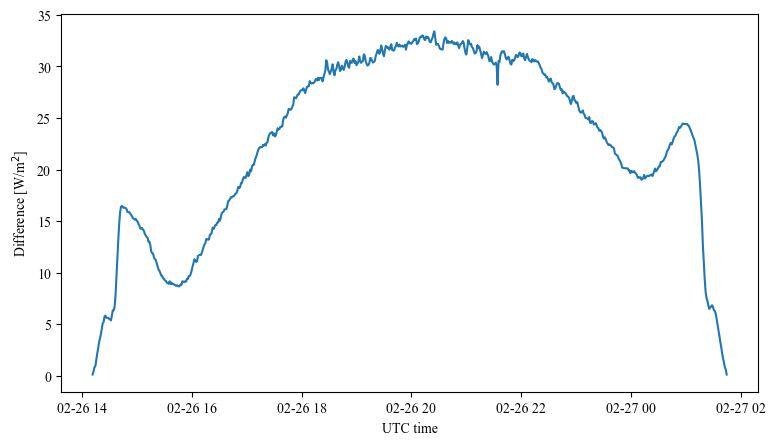

In [10]:
# show the difference between the measured GHI and GHI calculated by the PVLIB
plt.figure(figsize=(9,5),dpi=100)
plt.plot(df_test.index,(df_test['ghi_measure']-df_test['ghi_model']),label='Difference')
plt.xlabel('UTC time')
plt.ylabel('Difference [W/m$^2$]')
plt.show()

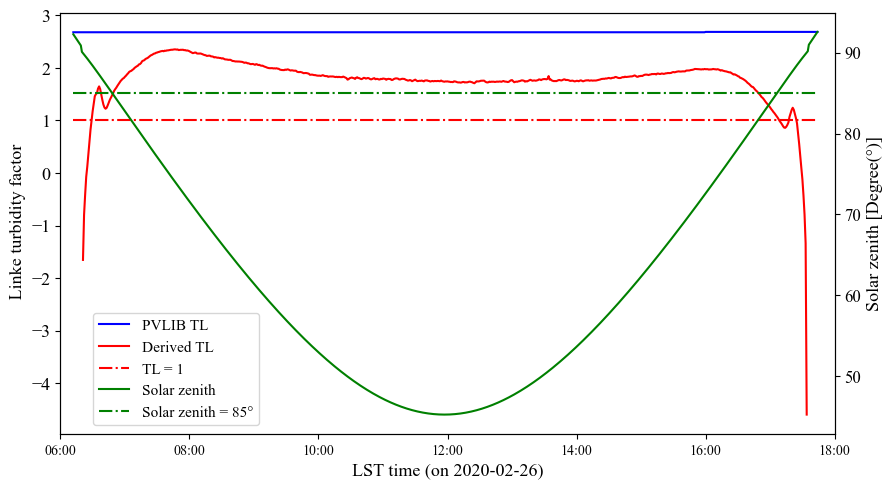

In [11]:
df = df_test.copy()

fig, ax1 = plt.subplots(figsize = (9,5),dpi=100)

ax1.set_xlabel('LST time (on 2020-02-26)',fontsize = 13)
ax1.set_ylabel(' Linke turbidity factor',fontsize = 13)
ax1.plot(df.index, df['tl_model'], color='blue', label = 'PVLIB TL')
ax1.plot(df.index, df['tl_cal'], color='red',label = 'Derived TL')
ax1.plot([df.index[0],df.index[-1]], [1,1], linestyle = '-.', color='red',label = 'TL = 1') # the line of TL is 1
ax1.tick_params(axis='y', labelsize=13)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Solar zenith [Degree(°)]',fontsize = 13)  # we already handled the x-label with ax1
ax2.plot(df.index, df['apparent_zenith'], color='green',label = 'Solar zenith')
ax2.plot([df.index[0],df.index[-1]], [85,85],linestyle = '-.', color='green',label = 'Solar zenith = 85°') # the line of solar zenith is 85
ax2.tick_params(axis='x', labelsize=13)

fig.tight_layout() # otherwise the right y-label is slightly clipped
fig.legend(loc = 'center left',bbox_to_anchor=(0.1, 0.25),fontsize=11)

# set the labels on x-axis
x_index = pd.date_range(start='2020-02-26 14:00:00',end='2020-02-27 02:00:00',freq='2h')
plt.xlim(x_index[0],x_index[-1])
plt.xticks(pd.date_range(start='2020-02-26 14:00:00',end='2020-02-27 02:00:00',freq='2h'),
              ['06:00','08:00','10:00','12:00','14:00','16:00','18:00'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('fig3.pdf',bbox_inches='tight')
plt.show()

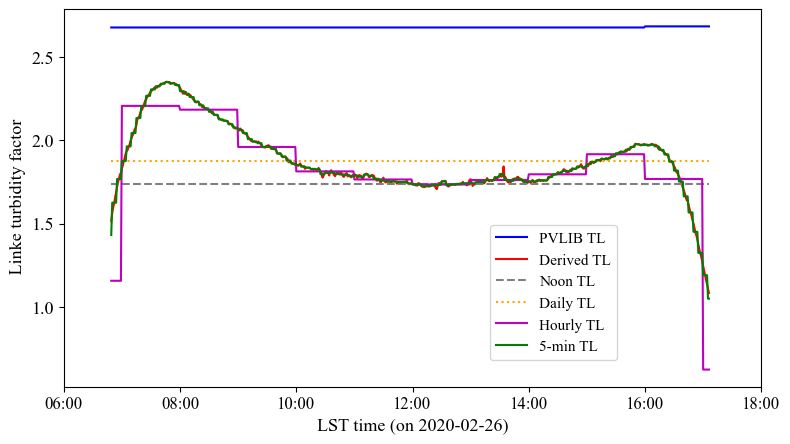

In [12]:
df = df_test.copy()
df = df[df['apparent_zenith'] < 85] # set the solar zenith angle less than 85

fig = plt.figure(figsize = (9,5),dpi=100)

plt.xlabel('LST time (on 2020-02-26)',fontsize = 13)
plt.ylabel(' Linke turbidity factor',fontsize = 13)
plt.plot(df.index, df['tl_model'].values, color='blue', label = 'PVLIB TL')
plt.plot(df.index, df['tl_cal'].values, color='red',label = 'Derived TL')

plt.plot(df.index, df['tl_noon'].values, linestyle = '--', color='grey',label = 'Noon TL')
plt.plot(df.index, df['tl_mean_d'], linestyle = ':', color='orange',label = 'Daily TL')

plt.plot(df.index, df['tl_mean_h'].values, color='m',label = 'Hourly TL')
plt.plot(df.index, df['tl_mean_5m'].values, color='green',label = '5-min TL')

plt.legend(loc = 'center left',bbox_to_anchor=(0.6, 0.25),fontsize=11)

plt.xticks(pd.date_range(start='2020-02-26 14:00:00',end='2020-02-27 02:00:00',freq='2h'),
              ['06:00','08:00','10:00','12:00','14:00','16:00','18:00'],fontsize=12)
plt.yticks(fontsize=13)
#plt.savefig('fig5.pdf',bbox_inches='tight')
plt.show()

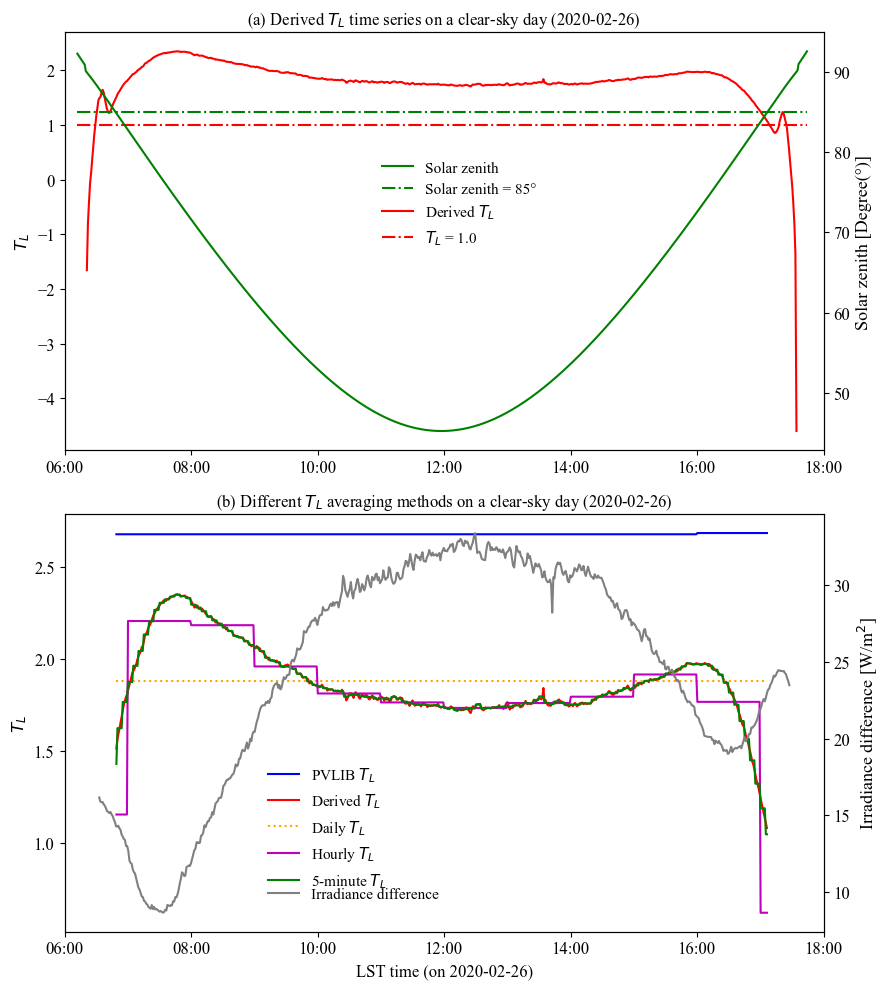

In [13]:
df = df_test.copy()

fig, ax = plt.subplots(2,1,figsize=(9,10),dpi=100)

ax[0].set_title('(a) Derived $T_L$ time series on a clear-sky day (2020-02-26)',fontsize = 12)
ax[0].set_ylabel('$T_L$',fontsize = 12)

ax[0].plot(df.index, df['tl_cal'], color='red',label = 'Derived $T_L$')
ax[0].plot([df.index[0],df.index[-1]], [1,1], linestyle = '-.', color='red',label = '$T_L$ = 1.0')

ax[0].tick_params(axis='y', labelsize=12)

ax2 = ax[0].twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Solar zenith [Degree(°)]',fontsize = 13)
ax2.plot(df.index, df['apparent_zenith'], color='green',label = 'Solar zenith')
ax2.plot([df.index[0],df.index[-1]], [85,85],linestyle = '-.', color='green',label = 'Solar zenith = 85°')
ax2.tick_params(axis='y', labelsize=12)

ax2.legend(loc = 'center left',bbox_to_anchor=(0.40, 0.65),frameon = False,fontsize=11)
ax[0].legend(loc = 'center left',bbox_to_anchor=(0.4, 0.54),frameon = False,fontsize=11)

x_index = pd.date_range(start='2020-02-26 14:00:00',end='2020-02-27 02:00:00',freq='2h')
plt.xlim(x_index[0],x_index[-1])
ax[0].set_xticks(pd.date_range(start='2020-02-26 14:00:00',end='2020-02-27 02:00:00',freq='2h'))
ax[0].set_xticklabels(['06:00','08:00','10:00','12:00','14:00','16:00','18:00'],fontsize=12)

df = df[df['apparent_zenith'] < 85]

ax[1].set_title('(b) Different $T_L$ averaging methods on a clear-sky day (2020-02-26)',fontsize = 12)
ax[1].set_xlabel('LST time (on 2020-02-26)',fontsize = 12)
ax[1].set_ylabel('$T_L$',fontsize = 12)
ax[1].plot(df.index, df['tl_model'].values, color='blue', label = 'PVLIB $T_L$')
ax[1].plot(df.index, df['tl_cal'].values, color='red',label = 'Derived $T_L$')

ax[1].plot(df.index, df['tl_mean_d'], linestyle = ':', color='orange',label = 'Daily $T_L$')

ax[1].plot(df.index, df['tl_mean_h'].values, color='m',label = 'Hourly $T_L$')
ax[1].plot(df.index, df['tl_mean_5m'].values, color='green',label = '5-minute $T_L$')
ax[1].legend(loc = 'center left',bbox_to_anchor=(0.25, 0.25),frameon = False,fontsize=11)

ax3 = ax[1].twinx()  # instantiate a second axes that shares the same x-axis

ax3.set_ylabel('Irradiance difference [W/m$^2$]',fontsize = 13)  # we already handled the x-label with ax1
ax3.plot(df.index, df['ghi_measure']-df['ghi_model'], color='gray',label = 'Irradiance difference')
ax3.tick_params(axis='y', labelsize=12)
ax3.legend(loc = 'center left',bbox_to_anchor=(0.25, 0.09),frameon = False,fontsize=11)

ax[1].set_xticks(pd.date_range(start='2020-02-26 14:00:00',end='2020-02-27 02:00:00',freq='2h'))
ax[1].set_xticklabels(['06:00','08:00','10:00','12:00','14:00','16:00','18:00'],fontsize=12)
ax[1].tick_params(axis='y', labelsize=12)
fig.tight_layout()
#plt.savefig('fig_tl_new.pdf',bbox_inches='tight')
plt.show()